In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [43]:
def mu(beta, n):
    # beta is the parameter for temperature
    # n is the number of iterations used in MCMC algorithm
    
    running_mean = 0
    running_var = 0
    s = np.ones((30,30))
    n_iter = 0
    n_total = 0
    
    while True:
        r1, r2 = np.random.randint(0, 30), np.random.randint(0, 30)
        r1_p, r1_m = (r1 + 1) % 30, (r1 - 1) % 30
        r2_p, r2_m = (r2 + 1) % 30, (r2 - 1) % 30
        delta_h = 2 * s[r1, r2] * (s[r1_p, r2] + s[r1_m, r2] + s[r1, r2_p] + s[r1, r2_m])
        ratio = np.exp(-1 * beta * delta_h)
        
        accept = False
        if ratio > 1:
            accept = True
        else:
            u = np.random.rand()
            if u < ratio:
                accept = True
        
        if accept:
            s[r1, r2] = -s[r1, r2]
            rm_old = running_mean
            running_mean = (n_iter * running_mean + np.mean(s)) / (n_iter + 1)
            if n_iter > 0:
                running_var = ((n_iter - 1) * running_var + n_iter * (rm_old - running_mean)**2 + (np.mean(s) - running_mean)**2) / n_iter
            n_iter += 1
        
        n_total += 1
        if n_total >= n:
            break
            
    return running_mean, running_var
        

In [14]:
def true_mu(beta):
    res = 0
    if beta > 0.4408:
        res = (1 - (np.sinh(2*beta))**(-4))**(1/8)
    return res

In [28]:
x_range = np.linspace(0.2, 1, 81)
y_range = np.zeros(81)

for i in range(81):
    y_range[i] = true_mu(x_range[i])


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.74932261, 0.81463813, 0.85196282, 0.87752291, 0.89651849,
       0.91131938, 0.92321481, 0.93298706, 0.94114743, 0.94804875,
       0.95394464, 0.95902341, 0.96342855, 0.96727172, 0.97064138,
       0.97360867, 0.97623151, 0.97855764, 0.98062671, 0.98247201,
       0.98412165, 0.98559954, 0.98692613, 0.98811902, 0.98919342,
       0.99016254, 0.99103788, 0.99182952, 0.99254629, 0.99319597,
       0.99378543, 0.99432075, 0.99480733, 0.99524995, 0.9956529 ,
       0.99601999, 0.99635464, 0.9966599 , 0.99693852, 0.99719296,
       0.99742544, 0.99763796, 0.99783233, 0.99801017, 0.99817296,
       0.99832202, 0.99845857, 0.99858371, 0.99869841, 0.99880

In [47]:
rm_range = np.zeros(81)
rv_range = np.zeros(81)

for i in range(81):
    t0 = time.time()
    rm, rv = mu(x_range[i], 100000000)
    t1 = time.time()
    print('Iteration ' + str(i+1) + ' is finished. Time spent: ' + str(t1-t0) + ' seconds.')
    rm_range[i] = rm
    rv_range[i] = rv

Iteration 1 is finished. Time spent: 873.916778087616 seconds.
Iteration 2 is finished. Time spent: 856.5867943763733 seconds.
Iteration 3 is finished. Time spent: 858.0103080272675 seconds.
Iteration 4 is finished. Time spent: 851.4006190299988 seconds.
Iteration 5 is finished. Time spent: 833.5456876754761 seconds.
Iteration 6 is finished. Time spent: 833.5841779708862 seconds.
Iteration 7 is finished. Time spent: 818.0942862033844 seconds.
Iteration 8 is finished. Time spent: 783.0790331363678 seconds.
Iteration 9 is finished. Time spent: 783.7706849575043 seconds.
Iteration 10 is finished. Time spent: 765.7901680469513 seconds.
Iteration 11 is finished. Time spent: 756.4506587982178 seconds.
Iteration 12 is finished. Time spent: 754.8555262088776 seconds.
Iteration 13 is finished. Time spent: 733.7744269371033 seconds.
Iteration 14 is finished. Time spent: 728.1668407917023 seconds.
Iteration 15 is finished. Time spent: 706.6599638462067 seconds.
Iteration 16 is finished. Time spen

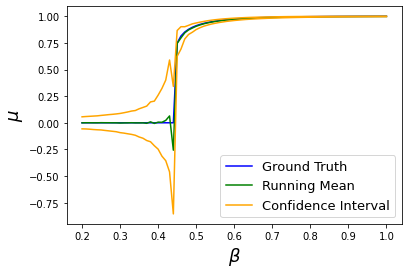

In [55]:
plt.plot(x_range, y_range, label='Ground Truth', color='blue')
plt.plot(x_range, rm_range, label='Running Mean', color='green')
plt.plot(x_range, rm_range + np.sqrt(rv_range), label='Confidence Interval', color='orange')
plt.plot(x_range, rm_range - np.sqrt(rv_range), color='orange')
plt.xlabel(r'$\beta$', fontsize = 18)
plt.ylabel(r'$\mu$', fontsize = 18)
plt.legend(fontsize = 13)
# plt.savefig('final_p3plot.pdf')